# DDA

In [7]:
#import libraries
import pandas as pd
import plotly.express as px

In [8]:
#load the data
df1 = pd.read_csv('./daten/plz.csv')
print(df1.head(3))
df2 = pd.read_csv('./daten/plz_geocoord.csv')
print(df2.head(3))

   PLZ_Code        PLZ_Name  Kreis_Code                 Kreis_Name  \
0     52134    Herzogenrath        5334  Kreis Städteregion Aachen   
1     41372  Niederkrüchten        5166              Kreis Viersen   
2     52379      Langerwehe        5358                Kreis Düren   

   Bundesland_Code      Bundesland_Name  
0                5  Nordrhein-Westfalen  
1                5  Nordrhein-Westfalen  
2                5  Nordrhein-Westfalen  
   PLZ_Code        lat        lng
0      1067  51.057550  13.717065
1      1069  51.039135  13.737675
2      1097  51.065908  13.736152


# Map

Create a combined data frame.

In [9]:
cdf = pd.merge(df1, df2, on='PLZ_Code')
cdf

,PLZ_Code,PLZ_Name,Kreis_Code,Kreis_Name,Bundesland_Code,Bundesland_Name,lat,lng
0,52134,Herzogenrath,5334,Kreis Städteregion Aachen,5,Nordrhein-Westfalen,50.884022,6.108661
1,41372,Niederkrüchten,5166,Kreis Viersen,5,Nordrhein-Westfalen,51.216809,6.155755
2,52379,Langerwehe,5358,Kreis Düren,5,Nordrhein-Westfalen,50.807003,6.376601
3,54614,Schönecken,7232,Landkreis Eifelkreis Bitburg-Prüm,7,Rheinland-Pfalz,50.158476,6.459364
4,53949,Dahlem,5366,Kreis Euskirchen,5,Nordrhein-Westfalen,50.386359,6.546409
...,...,...,...,...,...,...,...,...
8907,66506,Maßweiler,7340,Landkreis Südwestpfalz,7,Rheinland-Pfalz,49.267010,7.537753
8908,58239,Schwerte,5978,Kreis Unna,5,Nordrhein-Westfalen,51.428930,7.565632
8909,56070,Koblenz,7111,Kreisfreie Stadt Koblenz,7,Rheinland-Pfalz,50.385786,7.581679
8910,56321,Rhens,7137,Landkreis Mayen-Koblenz,7,Rheinland-Pfalz,50.279646,7.615526


In [10]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PLZ_Code         8912 non-null   int64  
 1   PLZ_Name         8912 non-null   object 
 2   Kreis_Code       8912 non-null   int64  
 3   Kreis_Name       8912 non-null   object 
 4   Bundesland_Code  8912 non-null   int64  
 5   Bundesland_Name  8912 non-null   object 
 6   lat              8912 non-null   float64
 7   lng              8912 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 557.1+ KB


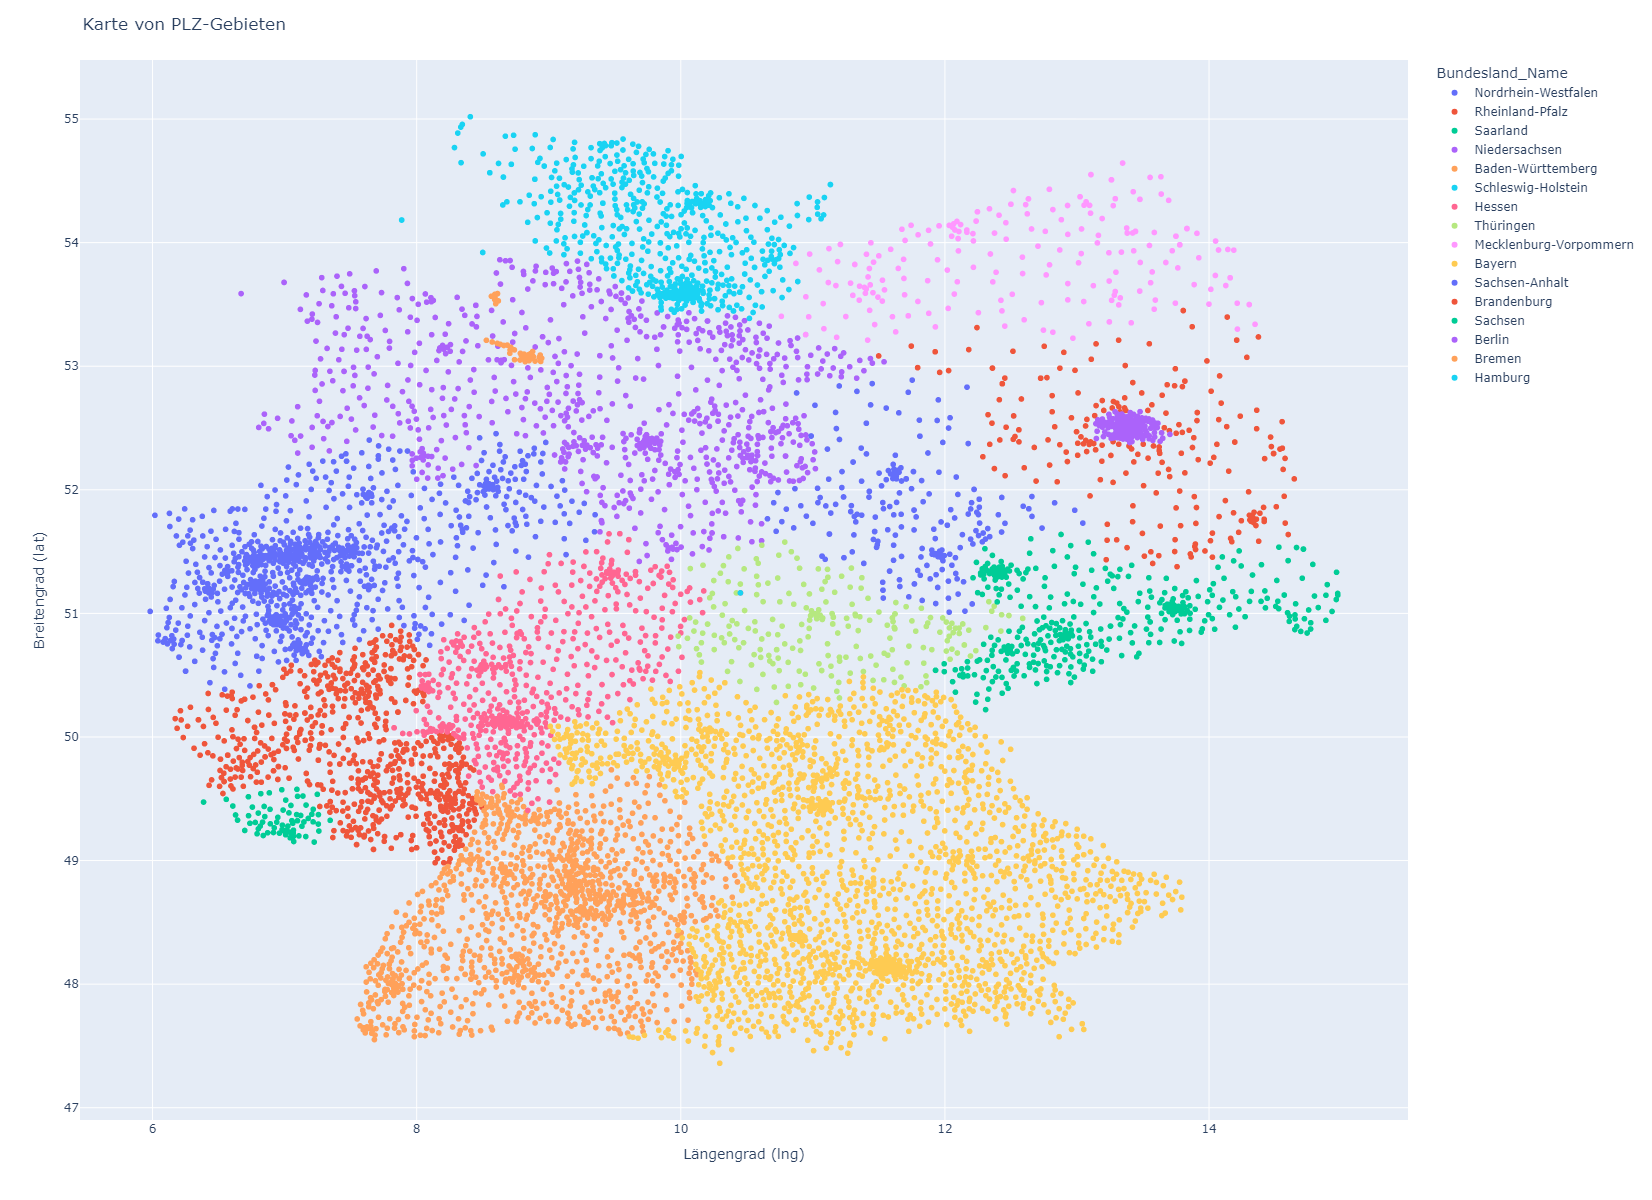

In [21]:
# Visual Python: Visualization > Plotly

cdf['Stadt, Kreis, Land'] = cdf['PLZ_Name'] + ', ' + cdf['Kreis_Name'] + ', ' + cdf['Bundesland_Name']

fig = px.scatter(cdf, x='lng', y='lat', color='Bundesland_Name', hover_data=['Stadt, Kreis, Land'], width=1400, height=1200)

fig.update_layout(
    title="Karte von PLZ-Gebieten",
    xaxis_title="Längengrad (lng)",
    yaxis_title="Breitengrad (lat)"
)
fig.show()

so sollte das fertige koordinatensystem aussehen:

![Deutschland plotly](fotos/v1.png)